In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
def parse_line(l):
    l = l.split('&')
    return [clean_tok(_) for _ in l]

def clean_tok(_):
    _ = _.strip().replace('\\','').replace('textbf{','').replace('}','').strip()
    return float(_)

In [4]:
s="""0  &  0.292  &  1e3 \\
10  &  0.292  &  1e3\\
textbf{17}  &  0.291  &  1e3\\
50  &  0.290  &  1e3\\
250  &  0.280  &  4e3\\
1e3  &  0.264  &  1.6e4\\
5e3  &  0.241  &  6.4e4\\
2.5e4  &  0.158  &  6.4e4\\"""
d = [parse_line(_) for _ in s.split('\n')]
df_al = pd.DataFrame(data=d, columns=['$\sigma$','NCE','$\lambda$'])

In [5]:
s="""0  & 0.288 &  0 \\
10  &  0.280  &  200\\
textbf{17}  &  0.276  &  200\\
50  &  0.271  &  200\\
250  &  0.261  &  200\\
1e3  &  0.251  &  200\\
5e3  &  0.241  &  200\\
2.5e4  &  0.228  &  200\\"""
d = [parse_line(_) for _ in s.split('\n')]
df_te = pd.DataFrame(data=d, columns=['$\sigma$','NCE','prior'])

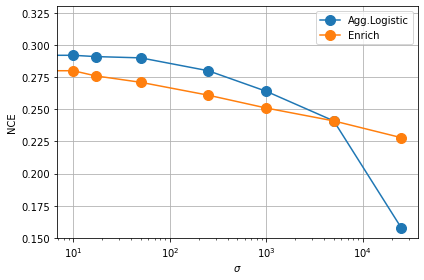

In [6]:
ax = df_al.plot(x='$\sigma$', y='NCE', label='Agg.Logistic', logx=True, ms=10, marker='o')
ax = df_te.plot(x='$\sigma$', y='NCE', label='Enrich', logx=True, ax=ax, ms=10, marker='o')
ax.set_ylabel('NCE')
ax.set_ylim(.15,.33)
plt.grid()
plt.tight_layout()
plt.savefig('NCE_click.png')

In [7]:
s="""10 & 0.315 & 1e+03     \\
17 & 0.315 & 1e+03     \\
50 & 0.312 & 1e+03     \\
250 & 0.287 & 4e+03     \\
1e+03 & 0.256 & 1.6e+04     \\
5e+03 & 0.203 & 6.4e+04     \\
2.5e+04 & -0.0605 & 6.4e+04     \\"""
d = [parse_line(_) for _ in s.split('\n')]
df_al_sales = pd.DataFrame(data=d, columns=['$\sigma$','NCE','$\lambda$'])

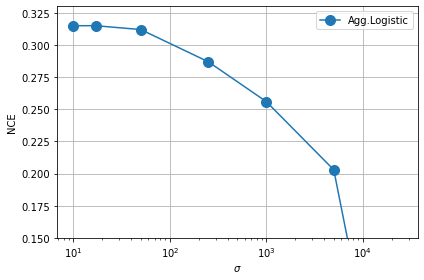

In [8]:
ax = df_al_sales.plot(x='$\sigma$', y='NCE', label='Agg.Logistic', logx=True, ms=10, marker='o')
#ax = df_te_sales.plot(x='$\sigma$', y='NCE', label='Enrich', logx=True, ax=ax, ms=10, marker='o')
ax.set_ylabel('NCE')
ax.set_ylim(.15,.33)
plt.grid()
plt.tight_layout()
plt.savefig('NCE_sales.png')

In [9]:
plt.rcParams.update({'font.size': 13})

Granular Sample Size  Agg.Logistic  Enrich
0              100000.0         0.111   0.283
1              200000.0         0.221   0.288
2              500000.0         0.275   0.293
3             1000000.0         0.289   0.295
4             2000000.0         0.294   0.298
5             3630000.0         0.297   0.299

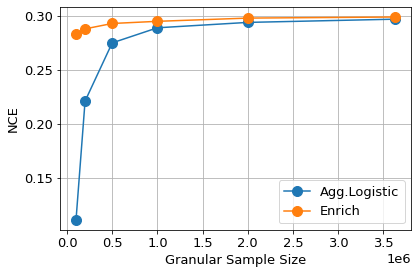

In [10]:
s = '''1e5  &  0.111  & 0.283 \\ 
2e5  &  0.221  & 0.288 \\ 
5e5  &  0.275  & 0.293 \\ 
1e6  &  0.289 & 0.295 \\ 
2e6  &  0.294  & 0.298 \\ 
3.63e6  &  0.297  & 0.299 \\ '''
d = [parse_line(_) for _ in s.split('\n')]
df_samplesize_click = pd.DataFrame(data=d, columns=['Granular Sample Size','Agg.Logistic','Enrich'])

ax = df_samplesize_click.plot(x='Granular Sample Size', y='Agg.Logistic', label='Agg.Logistic', ms=10, marker='o')
ax = df_samplesize_click.plot(x='Granular Sample Size', y='Enrich', label='Enrich', ms=10, marker='o', ax=ax)
ax.set_ylabel('NCE')
plt.grid()
plt.tight_layout()
plt.savefig('sample_size_click_no_noise.png')
df_samplesize_click

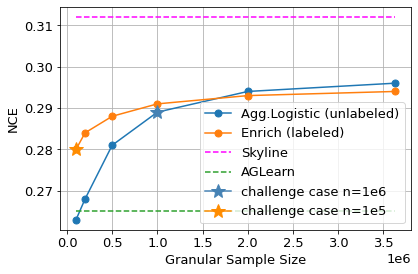

In [48]:
s = '''1e5  &  0.263  & 0.280 \\ 
2e5  &  0.268  & 0.284 \\ 
5e5  &  0.281  & 0.288 \\ 
1e6  &  0.289 & 0.291 \\ 
2e6  &  0.294  & 0.293 \\ 
3.63e6  &  0.296  & 0.294 \\ '''
d = [parse_line(_) for _ in s.split('\n')]
df_samplesize_click = pd.DataFrame(data=d, columns=['Granular Sample Size','Agg.Logistic','Enrich'])

ax = df_samplesize_click.plot(x='Granular Sample Size', y='Agg.Logistic', label='Agg.Logistic (unlabeled)', 
                              ms=7, marker='o')
ax = df_samplesize_click.plot(x='Granular Sample Size', y='Enrich', label='Enrich (labeled)', 
                              ms=7, marker='o', ax=ax)
ax.plot(df_samplesize_click['Granular Sample Size'], [.312]*6, '--', label='Skyline', color='magenta')
ax.plot(df_samplesize_click['Granular Sample Size'], [.265]*6, '--', ms=10, label='AGLearn')
enrich_ix = 0
agglog_ix = 3
ax.plot(df_samplesize_click.iloc[agglog_ix]['Granular Sample Size'], 
        df_samplesize_click.iloc[agglog_ix]['Agg.Logistic'], ms=15, marker='*', c='steelblue', 
        label='challenge case n=1e6')
ax.plot(df_samplesize_click.iloc[enrich_ix]['Granular Sample Size'], 
        df_samplesize_click.iloc[enrich_ix]['Enrich'], ms=15, marker='*', c='darkorange', 
        label='challenge case n=1e5')

#ax.set_ylim(.26, .315)
ax.set_ylabel('NCE')
plt.grid()
plt.tight_layout()
plt.legend()
plt.savefig('sample_size_click_noise_chalenge.png')

In [27]:
[.312]*6

[0.312, 0.312, 0.312, 0.312, 0.312, 0.312]

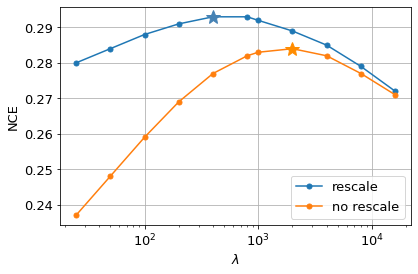

In [12]:
s='''25  &  .280  & .237  \\
50  &  .284  & .248  \\
100  & .288  & .259  \\
200  & .291  & .269  \\
400  & .293  & .277  \\
800  & .293 & .282  \\
1000  & .292  & .283  \\
2000  & .289  & .284  \\
4000  & .285  & .282  \\
8000  & .279  & .277  \\
16000  & .272  & .271  \\'''
d = [parse_line(_) for _ in s.split('\n')]
df_rescale_click = pd.DataFrame(data=d, columns=['$\lambda$', 'rescale', 'no rescale'])

star_rescale_ix = np.argmax(df_rescale_click['rescale'])
star_no_rescale_ix = np.argmax(df_rescale_click['no rescale'])

ax = df_rescale_click.plot(x='$\lambda$', y='rescale', logx=True, label='rescale', ms=5, marker='o')
ax = df_rescale_click.plot(x='$\lambda$', y='no rescale', label='no rescale', ms=5, marker='o', ax=ax)
ax.plot(df_rescale_click.iloc[star_rescale_ix]['$\lambda$'], 
        df_rescale_click.iloc[star_rescale_ix]['rescale'], ms=15, marker='*', c='steelblue')
ax.plot(df_rescale_click.iloc[star_no_rescale_ix]['$\lambda$'], 
        df_rescale_click.iloc[star_no_rescale_ix]['no rescale'], ms=15, marker='*', c='darkorange')
ax.set_ylabel('NCE')
plt.grid()
plt.tight_layout()
plt.savefig('rescale.png')

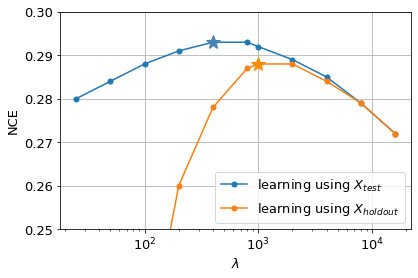

In [13]:
s='''25  &  .280  &  .0537  \\
50  &  .284  &  .152  \\
100  & .288  &  .219  \\
200  & .291  &  .26  \\
400  & .293  &  .278  \\
800  & .293  & .287  \\
1000  & .292  & .288  \\
2000  & .289  & .288  \\
4000  & .285  & .284  \\
8000  & .279  & .279  \\
16000  & .272  & .272  \\'''
d = [parse_line(_) for _ in s.split('\n')]
df_holdout_click = pd.DataFrame(data=d, columns=['$\lambda$', 'test', 'holdout'])

star_test_ix = np.argmax(df_holdout_click['test'])
star_holdout_ix = np.argmax(df_holdout_click['holdout'])

ax = df_holdout_click.plot(x='$\lambda$', y='test', logx=True, label='learning using $X_{test}$', ms=5, marker='o')
ax = df_holdout_click.plot(x='$\lambda$', y='holdout', label='learning using $X_{holdout}$', ms=5, marker='o', ax=ax)
ax.plot(df_holdout_click.iloc[star_test_ix]['$\lambda$'], 
        df_holdout_click.iloc[star_test_ix]['test'], ms=15, marker='*', c='steelblue')
ax.plot(df_holdout_click.iloc[star_holdout_ix]['$\lambda$'], 
        df_holdout_click.iloc[star_holdout_ix]['holdout'], ms=15, marker='*', c='darkorange')
ax.set_ylabel('NCE')
plt.grid()
plt.tight_layout()
plt.ylim(.25, .3)
plt.savefig('holdout.png')

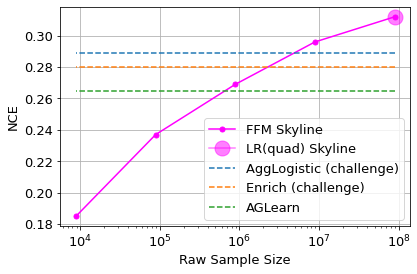

In [44]:
#    LR (quad) & 88,600,473 & 1 & .312\\
s='''88,600,473 & 1 & .312\\
8,860,047 & .1 & .296 \\
886,004 &.01 & .269 \\
88,600 &.001 & .237 \\
8,860 &.0001 & .185 \\'''.replace(',','')
d = [parse_line(_) for _ in s.split('\n')]
df_skyline = pd.DataFrame(data=d, columns=['Raw Sample Size', 'scale', 'NCE'])

ax = df_skyline.plot(x='Raw Sample Size', y='NCE', logx=True, ms=5, marker='o', label='FFM Skyline',c='magenta')
ax.plot(88600473, .312, ms=15, marker='o', c='magenta', label='LR(quad) Skyline', alpha=.5)
ax.plot(df_skyline['Raw Sample Size'], [.289]*5, '--', ms=10, label='AggLogistic (challenge)')
ax.plot(df_skyline['Raw Sample Size'], [.280]*5, '--', ms=10, label='Enrich (challenge)')
ax.plot(df_skyline['Raw Sample Size'], [.265]*5, '--', ms=10, label='AGLearn')
ax.set_ylabel('NCE')
plt.grid()
plt.tight_layout()
plt.legend()
plt.savefig('click_skyline.png')